In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

In [ ]:
df =pd.read_csv("/content/vista minable - ordenes de compra.csv" , header = 0 )

In [ ]:
df.nunique()

,0
Internal ID,176069
Class,7
Fecha y Hora,851000
Field,2
Old Value,15
New Value,16
Role,23
Sociedad Anónima,4
Ubicación Anónima,62
Nombre Anónimo,622


In [ ]:
df.shape

(1112240, 12)

<ipython-input-37-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


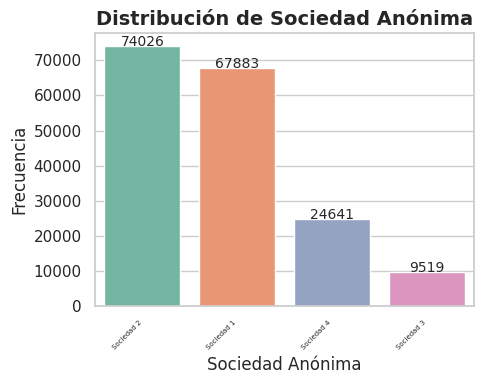

<ipython-input-37-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


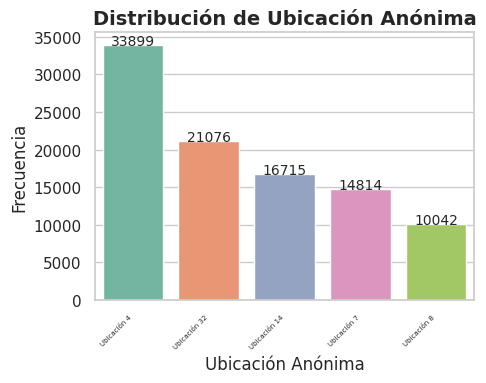

<ipython-input-37-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


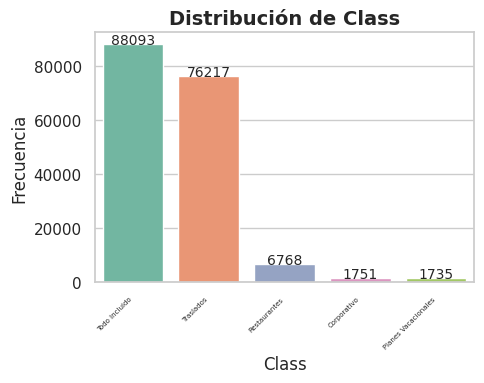

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_unique = df.drop_duplicates(subset= ['Internal ID'])

## NUMERO DE INTERACCIONES

# Set style for better aesthetics
sns.set(style="whitegrid")

# List of columns to plot
columns = ['Sociedad Anónima', 'Ubicación Anónima', 'Class']

# Assuming 'df_unique' and 'columns' are already defined
# Loop through each column and generate a count plot
for i in columns:
    # Get the top 5 most common categories in each column
    order = df_unique[i].value_counts().head().index

    # Create the count plot
    plt.figure(figsize=(5, 4))  # Adjust figure size
    ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=5)

    # Set plot titles and labels
    plt.title(f'Distribución de {i}', fontsize=14, fontweight='bold')
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    # Add count labels inside the bars using a loop for all patches
    for p in ax.patches:
        height = p.get_height()  # Get the height of the bar
        ax.text(
            p.get_x() + p.get_width() / 2.,  # Calculate the x-position for the label
            height + 3,  # Calculate the y-position for the label (adjust as needed)
            '{:1.0f}'.format(height),  # Format the label text (e.g., with 0 decimal places)
            ha="center",  # Horizontal alignment of the label
            fontsize=10,
        )

    # Show the plot with tight layout to prevent clipping
    plt.tight_layout()
    plt.show()

In [ ]:
# Tipo "class" que se tiene en el proceso
class_hotel = df.groupby('Ubicación Anónima')['Class'].nunique().sort_values(ascending=False).reset_index()
class_hotel['Class'].value_counts()

,count
Class,
1,51
2,8
3,3


In [ ]:
freq_new_value = df['New Value'].value_counts().reset_index() #reset_index(): This is used to turn the result of value_counts() into a DataFrame where the Value is the index and Frequency is the column.
freq_new_value.columns = ['Nombre Proceso' , 'Frecuencia en NV']

freq_old_value = df['Old Value'].value_counts().reset_index()
freq_old_value.columns = ['Nombre Proceso' , 'Frecuencia en OV']

freq_table = pd.merge ( freq_old_value , freq_new_value , on = 'Nombre Proceso' , how = 'outer' ).fillna(0)
freq_table


,Nombre Proceso,Frecuencia en OV,Frecuencia en NV
0,Aprobación del supervisor pendiente,114202.0,114797
1,Cerrado,54.0,26657
2,Creada,343684.0,114
3,Factura pendiente,145967.0,147037
4,Facturación pendiente/parcialmente recibido,48436.0,48855
5,Nivel 1,113631.0,180075
6,Nivel 2,103008.0,113518
7,Nivel 3,11385.0,100912
8,Nivel 4,315.0,1194
9,Nivel 5,18.0,153


In [ ]:
facturas_sociedad = df.groupby('Sociedad Anónima')['Internal ID'].nunique().sort_values(ascending=False).reset_index()
facturas_sociedad

,Sociedad Anónima,Internal ID
0,Sociedad 2,74026
1,Sociedad 1,67883
2,Sociedad 4,24641
3,Sociedad 3,9519


In [ ]:
##USUARIOS UNICOS QUE INTERVIENEN EN CADA FACTURACION
usuarios_factura = df.groupby('Internal ID')['Nombre Anónimo'].nunique().sort_values(ascending=False).reset_index()
usuarios_factura


,Internal ID,Nombre Anónimo
0,34554068,14
1,33640792,14
2,34577405,14
3,34578172,13
4,33641101,13
...,...,...
176064,38694765,1
176065,38694650,1
176066,56117719,1
176067,38722797,1


In [ ]:
usuarios_factura.describe()

,Internal ID,Nombre Anónimo
count,1.760690e+05,176069.000000
mean,5.047862e+07,4.476222
std,1.054489e+07,1.562170
min,3.326513e+07,1.000000
25%,4.100404e+07,3.000000
50%,5.026503e+07,5.000000
75%,5.985587e+07,6.000000
max,7.089803e+07,14.000000


In [ ]:
usuarios_proceso = df.groupby('New Value')['Nombre Anónimo'].nunique().sort_values(ascending=False).reset_index()
usuarios_proceso

,New Value,Nombre Anónimo
0,Factura pendiente,414
1,Facturación pendiente/parcialmente recibido,296
2,Recepción pendiente,181
3,Nivel 2,154
4,Nivel 1,142
5,Cerrado,134
6,Aprobación del supervisor pendiente,131
7,Parcialmente recibido,102
8,Totalmente facturado,97
9,Rechazado por supervisor,92


In [ ]:
# 1. Average Timestamp by 'Document Number'
avg_timestamp_by_doc = df.groupby('Internal ID')['TimeStamp'].mean().reset_index()

# 2. Average Timestamp by 'New Value'
avg_timestamp_by_new_value = df.groupby('New Value')['TimeStamp'].mean().reset_index()

# Display the results
print("Average Timestamp by Internal ID:")
print(avg_timestamp_by_doc)

print("\nAverage Timestamp by New Value:")
print(avg_timestamp_by_new_value)

Average Timestamp by Internal ID:
        Internal ID     TimeStamp
0          33265128  46643.833333
1          33293841  36690.538095
2          33294552   2242.980556
3          33295071   9190.780556
4          33295285   2002.047222
...             ...           ...
176064     68634438     16.683333
176065     69393590   2513.205556
176066     69987917   4798.513889
176067     69988849   4798.561111
176068     70898032      0.000000

[176069 rows x 2 columns]

Average Timestamp by New Value:
                                      New Value     TimeStamp
0           Aprobación del supervisor pendiente   1960.273811
1                                       Cerrado   4506.332092
2                                        Creada    361.837573
3                             Factura pendiente  13429.916792
4   Facturación pendiente/parcialmente recibido  10015.754048
5                                       Nivel 1   2095.321436
6                                       Nivel 2    537.471655
7 

In [ ]:
avg_timestamp_by_doc

,Internal ID,TimeStamp
0,33265128,46643.833333
1,33293841,36690.538095
2,33294552,2242.980556
3,33295071,9190.780556
4,33295285,2002.047222
...,...,...
176064,68634438,16.683333
176065,69393590,2513.205556
176066,69987917,4798.513889
176067,69988849,4798.561111


In [ ]:
avg_timestamp_by_doc['TimeStamp'].mean()

np.float64(9325.48464902705)